Hi Nadav. I'm Svetlana and will review your project. I've added all my comments to new cells with different coloring. Please don't delete my comments.


The first time I see a mistake, I'll just point it out and let you find it and fix it yourself. In a real job, your boss will do the same, and I'm trying to prepare you to work as an Data Analyst. But if you can't handle this task yet, I'll give you a more accurate hint at the next check.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
If you did something great I'm using green color for my comment
</div>

<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
If I want to give you advice or think that something can be improved, then I'll use yellow. This is an optional recommendation.
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
If the topic requires some extra work so I can accept it then the color will be red
</div>

## Review v. 1

Thank you for sending your project. You've done a really good job on it! While there's room for improvement, on the whole, your project is looking good. I've found some tiny mistakes in your project. They'll be easy to fix. Every issue with our code is a chance for us to learn something new. 

## Review v. 2

All your hard work has paid off, and now your project is perfect! Your project has passed code review. Congratulations! Keep up the good work. Good luck! 

# Yandex100 - How to Tell A Story Using Data

### Robot Run Cafe Project


### Link to presentation

Presentation: <link https://drive.google.com/drive/folders/1SlLDMcYWjeNd8MXo4k6u0XJ8O2XmzIwN?usp=sharing> 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
A really good presentation, but please add the second slide with problem statement. Also it will be nice to impove design of the presentation. Please see for details: https://www.pinterest.ru/pin/368943394472448360/, https://slidebean.com/templates/restaurant-business-plan-template
</div>

# Goal

### Research Market Conditions in L.A for the establishment and potentinal of a Small robot-run Cafe 


# Table of Contents


## **[Step 1: Download the data and prepare it for analysis](#1)**

### [General data info](#11)


### [Data Preprocessing](#12)
 
 
 
## **[Step 2. Data analysis](#2)**

### [Investigate the proportions of the various types of establishments](#21)

[Method 1: plot interactive pie chart using plotly.graph_objects](#211)

[Method 2: plot interactive pie chart using the px.pie method](#212)
 
### [Investigate the proportions of chain and nonchain establishments](#22)

[count the total number of chains and nonchains establishments](#221)

[Method 1: Stacked Seaborn plot](#222)

[Method 2: Interactive Stacked plot](#223)

[Method 3: Interactive barplot by object type](#224)

[Method 4: chain-nonchain proportions](#225)

### [Which type of establishment is typically a chain?](#23)

[Method 1: General distribution of the chain data](#231)

[Method 2: Distribution by object  type ](#232)


### [What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?](#24)

[Method 1: General look by chain/nonchain data](#241)

[Method 2: explore only chains](#242)



### [Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats?](#25)

[Average No. of seats by category](#251)

[Average No. of seats by category and chain/nonchain classification](#252)

[Plot 1: Average No. of Seats - Interactive bar chart](#253)

[Plot 2: No. of Seats - Boxplots](#254)


### [Put the data on street names from the address column in a separate column](#26)

### [Plot a graph of the top ten streets by number of restaurants](#27)

### [Find the number of streets that only have one restaurant](#28)

### [For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?](#29)

[Average number of seats for top 10 streets after group](#291)

[Number of seats distribution - top 10 streets](#292)

[Number of seats distribution - total data](#293)

[Additional Analysis: Check chain distrubutions](#294)

[Average seats vs. rest number in streets: General data gropued by street](#295)

[Average seats vs. rest number in streets: General data (not grouped)](#296)


## **[Step 3: Overall Conclusion](#3)**

### [Market Conditions](#31)

### [For robot run cafe Establishment](#32)



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It’s great that you added a table of contents with links and a goal of the project. 
</div>

In [1]:
pip install chart_studio

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 64 kB 1.1 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install usaddress-scourgify

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 98 kB 2.9 MB/s eta 0:00:011
     |████████████████████████████████| 63 kB 2.1 MB/s  eta 0:00:01
     |████████████████████████████████| 743 kB 23.0 MB/s eta 0:00:01
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
Note: you may need to restart the kernel to use updated packages.


In [3]:
!pip install plotly==4.4.1


Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 7.3 MB 2.0 MB/s eta 0:00:01


In [4]:


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math as math
#import cufflinks as cf
import datetime as dt
from functools import reduce
from scipy import stats as st
import plotly.express as px
import scipy.stats as stats
import plotly.graph_objects as go
#import chart_studio.plotly as py
import usaddress

%matplotlib inline

#from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
#init_notebook_mode(connected = True)
#cf.go_offline()

import sys
import warnings
if not sys.warnoptions:
       warnings.simplefilter("ignore")
        
        
        

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done for using warnoptions :)
</div>

<a class="anchor" id="1"></a>

# Step 1. Download the data and prepare it for analysis

<a class="anchor" id="11"></a>

### General data info 

In [5]:
rest_data = pd.read_csv('/datasets/rest_data_us.csv')
display(rest_data.head())
display(rest_data.info())
display(rest_data.describe())

id          object_name                    address  chain object_type  \
0  11786  HABITAT COFFEE SHOP     3708 N EAGLE ROCK BLVD  False        Cafe   
1  11787             REILLY'S        100 WORLD WAY # 120  False  Restaurant   
2  11788       STREET CHURROS  6801 HOLLYWOOD BLVD # 253  False   Fast Food   
3  11789    TRINITI ECHO PARK         1814 W SUNSET BLVD  False  Restaurant   
4  11790               POLLEN         2100 ECHO PARK AVE  False  Restaurant   

   number  
0      26  
1       9  
2      20  
3      22  
4      20

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
id             9651 non-null int64
object_name    9651 non-null object
address        9651 non-null object
chain          9648 non-null object
object_type    9651 non-null object
number         9651 non-null int64
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


None

id       number
count   9651.000000  9651.000000
mean   16611.000000    43.695161
std     2786.148058    47.622874
min    11786.000000     1.000000
25%    14198.500000    14.000000
50%    16611.000000    27.000000
75%    19023.500000    46.000000
max    21436.000000   229.000000

<a class="anchor" id="12"></a>
### Data Preprocessing

In [6]:
# check for duplicates / missing values

# check for duplicates
display(rest_data.duplicated().value_counts())

# check for missing values
display(rest_data.isnull().sum())

# Conclusion - no duplicates 
# Conclusion - 3 missing values out of 9651 rows, not critical.

display(rest_data.object_type.value_counts())

rest_data = rest_data.dropna()

False    9651
dtype: int64

id             0
object_name    0
address        0
chain          3
object_type    0
number         0
dtype: int64

Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: object_type, dtype: int64

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Please note that it’s necessary to add a conclusion for each part of the project. Please take it into account for the future. 
</div>

##### Conclsions: (after v1)
- There are 3 nan values in chain columns, which might cause problem when calculating proportions for example. These were filled using fillna(0) to solve this issue.
- The majority of the data is of resraurant object_type.
- There is a big std value for number of seats ('numbr' column).
- The data does not contain duplicate rows.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Well done that you described problems with data. 
</div>

<a class="anchor" id="2"></a>
# Step 2. Data analysis

<a class="anchor" id="21"></a>
### Investigate the proportions of the various types of establishments. Plot a graph.

<a class="anchor" id="211"></a>
#### Method 1: plot interactive pie chart using plotly.graph_objects

In [7]:
# Method 1: plot interactive pie chart using plotly.graph_objects

# make a df of vlaue counts for pie chart 
object_count = rest_data.object_type.value_counts().reset_index()
object_count = object_count.rename(columns = {'index': 'object_type', 'object_type' : 'total'})

# make series objects for pie chart
rest_type = object_count.object_type
rest_count = object_count.total


In [8]:
object_count

object_type  total
0  Restaurant   7253
1   Fast Food   1066
2        Cafe    435
3       Pizza    319
4         Bar    292
5      Bakery    283

In [9]:
# plot pie chart
fig = go.Figure(data = [go.Pie(labels = rest_type, values = rest_count)])


fig.update_traces(hoverinfo='label+percent', textfont_size=15, textinfo='label+percent',
                  pull=[0.1,0,0,0,0,0],
                  marker=dict(line=dict(color='#0b0c10', width = 2) ))

# add title
fig.update_layout(
    title={
        'text': "Data Category Distribution",
        'y':0.9,
        'x':0.5,
        'xanchor': 'center',
        'yanchor': 'top'})

fig.show()

<a class="anchor" id="212"></a>
#### Method 2: plot interactive pie chart using the px.pie method

In [10]:
# link to builtin-colorscales: https://plotly.com/python/builtin-colorscales/
# options - instead of sequeuntial, choose diverging for other color peletts


# plot pie chart 
fig = px.pie(object_count, values = 'total', names = 'object_type', title = 'Data Category Distribution',
       color_discrete_sequence = px.colors.sequential.thermal)

# align plot title
fig.update_layout(
    title_x=0.45,
    title_y=0.95,
    mapbox={"style": "stamen-toner", "center": {"lon": 2, "lat" : 47}, "zoom": 4.8},
    margin={"l": 0, "r": 0, "b": 0, "t": 80})

##### Conclsions: (after v1)
- The pie chart presents the establishments distrubution by Category. We can see that the majority of the data (>75%) is controlled by restaurants. 
- This means that the reserach result might be less relevant for cafes, as this category makes only 4.5% of the data.

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
An excellent graphs, but please ad description/conclusions to the graphs. Please note that this applies to all other graphs too.
</div>

##### Comment: (after v1)
- right, summarized by conclusions for all graphs in the end of each sections. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
    
Could you please try to explain why restaurant is the most popular type of estamlishment?
</div>

<a class="anchor" id="22"></a>
### Investigate the proportions of chain and nonchain establishments. Plot a graph.

<a class="anchor" id="221"></a>
#### count the total number of chains and nonchains establishments

In [11]:
# count

# count the number of chains
chains_number = (rest_data.chain == True).sum()
print('Nummer of chain establieshmeints:', chains_number)

# count the number of nonchain
nonchains_number = (rest_data.chain == False).sum()
print('Nummer of nonchain establieshmeints:', nonchains_number)

display(nonchains_number/chains_number)

Nummer of chain establieshmeints: 3676
Nummer of nonchain establieshmeints: 5972


1.6245919477693145

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:

Could you please add graph for chain and nonchain establieshmeints?
</div>

##### Student comment: (after v1)
yes, provided in Method 4 of this chapter 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Ok :)
</div>

##### Conclusions:
- 3676 chain establishments
- 5972 nonchain establishments
- Nonchains amount is 1.62 times more then chain estblishments 

<a class="anchor" id="222"></a>
#### Method 1: Stacked Seaborn plot

In [12]:
# slice the dataframe to include only chain and object type
rest_data_slim = rest_data[['chain','object_type']]

# add a column in order to count the number of boolean values
rest_data_slim['new'] = 1

# create a df with the number of type (object type and chain/nonchain)
rest_data_slim_pivot = rest_data_slim.pivot_table(index = 'chain', columns = 'object_type', values = 'new', aggfunc = 'sum')
rest_data_slim_pivot = rest_data_slim_pivot.fillna(0)

In [13]:
rest_data_slim_pivot

object_type  Bakery    Bar   Cafe  Fast Food  Pizza  Restaurant
chain                                                          
False           0.0  215.0  169.0      461.0  166.0      4961.0
True          283.0   77.0  266.0      605.0  153.0      2292.0

In [14]:
# make a copy for the plot
rest_data_slim_chain = rest_data_slim_pivot.copy()
rest_data_slim_chain = rest_data_slim_pivot.rename(index = {False:' Nonchains', True : 'Chains'})

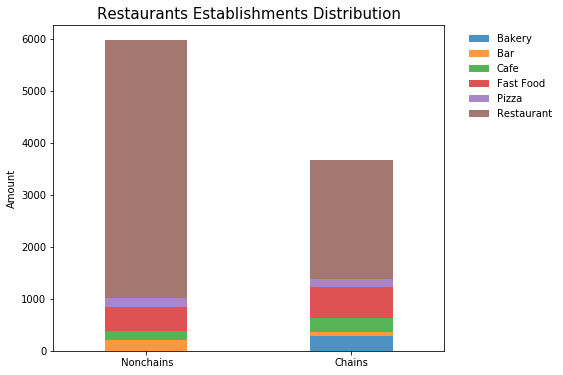

In [15]:
# plot stacked barplot
rest_data_slim_chain.plot(kind='bar', stacked=True, figsize = (7,6), alpha = 0.8, width = 0.4)
plt.title("Restaurants Establishments Distribution", fontsize = 15)

# align legend
plt.legend(bbox_to_anchor=(1.3, 1), frameon = False)

# edit axis
plt.xticks(rotation = 0)
plt.xlabel('')
plt.ylabel('Amount')


plt.savefig('Rest_Establishments_Distribution.png', bbox_inches = "tight")

plt.show()
# Figure 2 - use filtered columns - for exampel only for fast food and cafe establishments
#axis = rest_data_slim_pivot[["Fast Food", "Cafe"]].plot(kind="bar", stacked=True)
#fig = axis.get_figure()

<a class="anchor" id="223"></a>
#### Method 2: Interactive Stacked plot

In [16]:
rest_data[['chain','object_type']]

chain object_type
0     False        Cafe
1     False  Restaurant
2     False   Fast Food
3     False  Restaurant
4     False  Restaurant
...     ...         ...
9646  False  Restaurant
9647  False  Restaurant
9648   True   Fast Food
9649  False        Cafe
9650   True  Restaurant

[9648 rows x 2 columns]

In [17]:
rest_data_slim

chain object_type  new
0     False        Cafe    1
1     False  Restaurant    1
2     False   Fast Food    1
3     False  Restaurant    1
4     False  Restaurant    1
...     ...         ...  ...
9646  False  Restaurant    1
9647  False  Restaurant    1
9648   True   Fast Food    1
9649  False        Cafe    1
9650   True  Restaurant    1

[9648 rows x 3 columns]

In [19]:
# group the data by chain and object type, count the number of values for each group 
rest_data_grouped = rest_data_slim.groupby(['chain','object_type']).agg({'new':'count'}).reset_index().sort_values('object_type', ascending = False)
rest_data_grouped = rest_data_grouped.rename(columns = {'new':'count'})

# rename columns
rest_data_grouped['chain'] = rest_data_grouped['chain'].astype('str')
rest_data_grouped['chain'] = rest_data_grouped['chain'].replace({'True':'Chain', 'False':'Nonchain'})

# plot stacked barplot
fig = px.bar(rest_data_grouped, x="chain", y="count", color="object_type",
            hover_data=['object_type'], barmode = 'stack', title = 'Restaurants Establishments Distribution')

# edit layout
fig.update_layout(
    autosize=False,
    width=500,
    height=600)

# edit y axis range for round number

    
fig.show()

In [20]:
rest_data_slim_pivot.T

chain         False   True 
object_type                
Bakery          0.0   283.0
Bar           215.0    77.0
Cafe          169.0   266.0
Fast Food     461.0   605.0
Pizza         166.0   153.0
Restaurant   4961.0  2292.0

<a class="anchor" id="224"></a>
#### Method 3: Interactive barplot by object type

In [21]:
# Use .T in order to put False/True as columnes


# plot trace of False, and update with trace of True
fig = go.Figure()
fig.add_trace(go.Bar(x=rest_data_slim_pivot.T.index,
                     y=rest_data_slim_pivot.T[False],
                     name="Nonchain"))
fig.add_trace(go.Bar(x=rest_data_slim_pivot.T.index,
                     y=rest_data_slim_pivot.T[True],
                     name="Chain"))

fig.update_layout(
    title="Chain/Nonchain Distribution by Category",
    xaxis_title="Category",
    yaxis_title="Number of Establishments ",
    font=dict(

        size=12,
        color="black"
    ))

In [22]:
# cacuulate how much of the data is nonchain resturants

len(rest_data.query('chain == False & object_type  == "Restaurant"')) / len(rest_data)

0.5141998341625207

<a class="anchor" id="225"></a>
#### Method 4: chain-nonchain proportions

In [23]:
# create a new pivot tabel sortes by the precetanges of chain/nonchain for each object type

rest_chain_proportion = rest_data_slim_pivot.T
rest_chain_proportion = rest_chain_proportion.fillna(0)
rest_chain_proportion['chain_percent'] = rest_chain_proportion[True] / (rest_chain_proportion[False] + rest_chain_proportion[True])
rest_chain_proportion['nonchain_percent'] = 1 -rest_chain_proportion['chain_percent']
rest_chain_proportion['percent_of_total_chains'] = rest_chain_proportion[True] / rest_chain_proportion[True].sum()

rest_chain_proportion

chain         False    True  chain_percent  nonchain_percent  \
object_type                                                    
Bakery          0.0   283.0       1.000000          0.000000   
Bar           215.0    77.0       0.263699          0.736301   
Cafe          169.0   266.0       0.611494          0.388506   
Fast Food     461.0   605.0       0.567542          0.432458   
Pizza         166.0   153.0       0.479624          0.520376   
Restaurant   4961.0  2292.0       0.316007          0.683993   

chain        percent_of_total_chains  
object_type                           
Bakery                      0.076986  
Bar                         0.020947  
Cafe                        0.072361  
Fast Food                   0.164581  
Pizza                       0.041621  
Restaurant                  0.623504

In [24]:
# slice the df for pie chart of chain/nonchain 
chains_percentage = rest_chain_proportion.T.iloc[2:4][:]

# creates 2 serieses for pie chart 
example_index = chains_percentage.index
example_column = chains_percentage.Bar


# plot pie chart 
fig = go.Figure(data = [go.Pie(labels = example_index, values = example_column)])
fig.update_traces(hoverinfo='label+percent', textfont_size=15, textinfo='label+percent',
                  marker=dict(line=dict(color='#0b0c10', width = 2)))

fig.update_layout(
    title="Chain / Nonchain Proportions",
    xaxis_title="Category",
    yaxis_title="Number of Establishments ",
    font=dict(

        size=12,
        color="black"
    ))


fig.show()

##### Conclsions: (after v1)

Conclusions following the 4 plots:
- Nonchain establishments makes 73.6% of the data
- In restaurants category, there is a big difference in chain/nonchain proportions, where the amount of nonchain is double then chain establishments.  
- nonchain restaurants makes the majority of estblishments in L.A - 51.4% of the data

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Do you have any suggestions why domination of the non-chain establishments?
</div>

<a class="anchor" id="23"></a>
### Which type of establishment is typically a chain?

<a class="anchor" id="231"></a>
#### Method 1: General distribution of the chain data

In [25]:

fig = go.Figure(data = [go.Pie(labels = rest_chain_proportion.index, values = rest_chain_proportion[True])])
fig.update_traces(hoverinfo='label+percent', textfont_size=15, textinfo='label+percent',
                  marker=dict(line=dict(color='#0b0c10', width = 2)))

fig.update_layout(
    title="General distribution of the chain data",
    xaxis_title="Category",
    yaxis_title="Number of Establishments ",
    font=dict(

        size=12,
        color="black"
    ))


fig.show()

<a class="anchor" id="232"></a>
#### Method 2: Distribution by object  type 

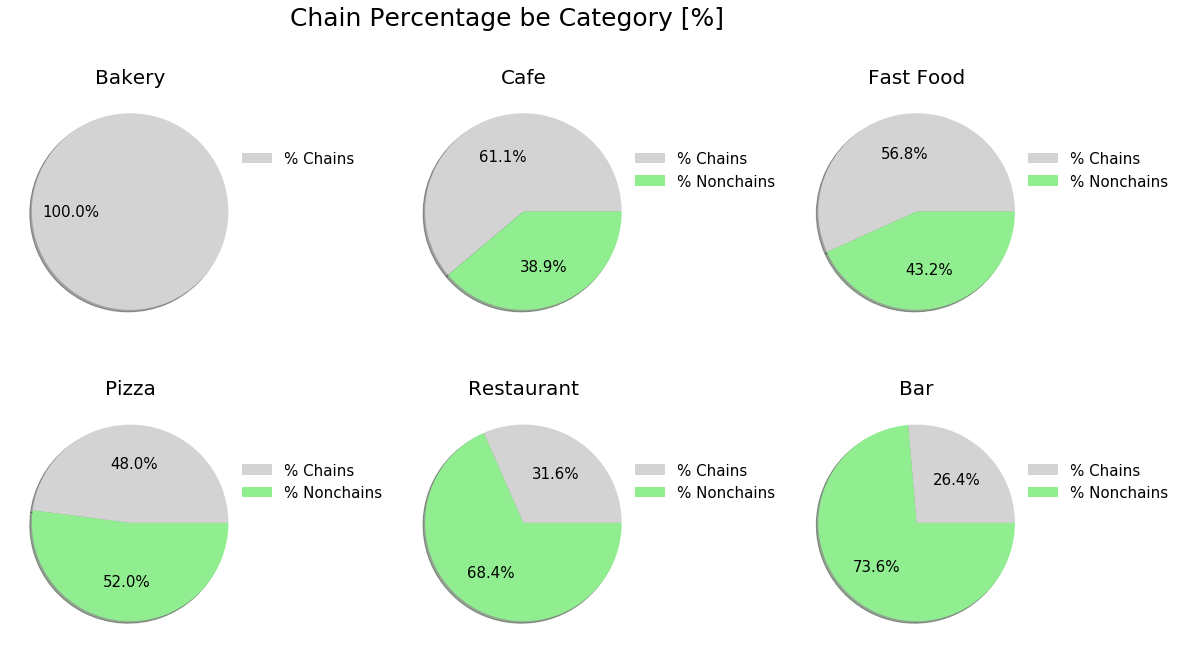

In [26]:
rest_chain_proportion['index1'] = rest_chain_proportion.index
rest_chain_proportions = rest_chain_proportion.reset_index()

rest_chain_precentage = rest_chain_proportions[['index1','chain_percent','nonchain_percent']].sort_values('chain_percent', ascending = False)
rest_chain_precentage = rest_chain_precentage.rename(columns = {'chain_percent' : '% Chains', 'nonchain_percent' : '% Nonchains'})




fig, axes = plt.subplots(2, 3, figsize=(10, 6))

explode = (1,1)
for i, (idx, row) in enumerate(rest_chain_precentage.set_index('index1').iterrows()):
    
    ax = axes[i // 3, i % 3]
    row = row[row.gt(row.sum() * .01)]
    ax.pie(row, startangle = 360, autopct='%1.1f%%', textprops={'fontsize': 15},shadow=True, colors= {'lightgray','lightgreen'})
    ax.set_title(idx, fontsize=20)
    ax.legend(row.index, bbox_to_anchor=(0.9, 0.8), frameon = False, prop={"size": 15})
   
    fig.set_size_inches(18.5, 10.5, forward=True)
    fig.suptitle('Chain Percentage be Category [%]', fontsize=25)
    fig.subplots_adjust(wspace=0.6)
# set non chain in ligh red, and is chain in positive green, try to let it a pull out 


plt.savefig('chain_preentage_by_category.png', bbox_inches = "tight", dpi=300)



##### Conclusions:
    
- Bakery shows 100% chains. 
- While most objects in the data who are classified as chains df are from the restaurants object type, We see that they make only 31.6% of the total restaurants.
- As expected, chains are more common for objects which are more casual - Pizzas, Cafes and Fast food. 
- it is importent to note that Bakeries, Pizzas, Bars and Cafes all have very few objects of in the data (less then 10% of each)

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent analysis :)
</div>

<a class="anchor" id="24"></a>
### What characterizes chains: many establishments with a small number of seats or a few establishments with a lot of seats?

<a class="anchor" id="241"></a>
#### Method 1: General look by chain/nonchain data

In [27]:
rest_data

id          object_name                      address  chain  \
0     11786  HABITAT COFFEE SHOP       3708 N EAGLE ROCK BLVD  False   
1     11787             REILLY'S          100 WORLD WAY # 120  False   
2     11788       STREET CHURROS    6801 HOLLYWOOD BLVD # 253  False   
3     11789    TRINITI ECHO PARK           1814 W SUNSET BLVD  False   
4     11790               POLLEN           2100 ECHO PARK AVE  False   
...     ...                  ...                          ...    ...   
9646  21432      HALL OF JUSTICE             217 W TEMPLE AVE  False   
9647  21433          FIN-MELROSE             5750 MELROSE AVE  False   
9648  21434          JUICY WINGZ          6741 HOLLYWOOD BLVD   True   
9649  21435      MEDIDATE COFFEE      548 S SPRING ST STE 100  False   
9650  21436         CAFE SPROUTS  1300 S SAN PEDRO ST STE 111   True   

     object_type  number  
0           Cafe      26  
1     Restaurant       9  
2      Fast Food      20  
3     Restaurant      22  
4     Restaurant      20  
...          ...     ...  
9646  Restaurant     122  
9647  Restaurant      93  
9648   Fast Food      15  
9649        Cafe       6  
9650  Restaurant      19  

[9648 rows x 6 columns]

In [28]:
fig = px.histogram(rest_data, x = "number", color = 'chain')
fig.show()

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Additional materials: https://www.analyticsvidhya.com/blog/2017/09/6-probability-distributions-data-science/
</div>

<div class="alert alert-danger" role="alert">
Reviewer's comment v. 1:
    
Could you please analyse graph?
</div>

##### Conclusions (after v1):
    
- We see that for both chain/nonchain, the histrogram shows a long-tail distribution. 
- Despite the different counts, the distribution for both chain/nonchain shows the same pattern.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
It's great that you analyzed the graph in details.
</div>

<a class="anchor" id="242"></a>
#### Method 2 : explore only chains

In [29]:
# take only those who chain value is True
rest_data_chains = rest_data[rest_data['chain'] == True]

# general look of distrubution 
# check the distrubution of number of seets - make a distrubution plot.


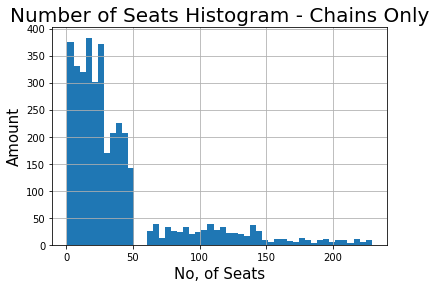

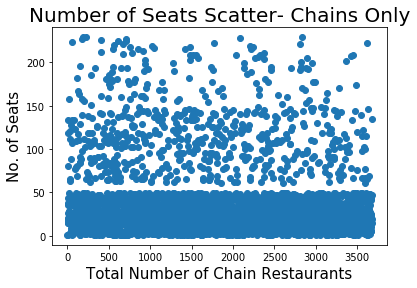

In [30]:

# general look at the distrubution

# method 1: histogram
rest_data_chains.hist('number', bins = 50)
plt.xlabel('No, of Seats', fontsize = 15)
plt.ylabel('Amount', fontsize = 15)
plt.title('Number of Seats Histogram - Chains Only', fontsize = 20)
plt.show()

# method 2: scatter plot
x_values = pd.Series(range(0, len(rest_data_chains)))
plt.scatter(x_values, rest_data_chains.number)
plt.xlabel('Total Number of Chain Restaurants', fontsize = 15)
plt.ylabel('No. of Seats', fontsize = 15)
plt.title('Number of Seats Scatter- Chains Only', fontsize = 20)
plt.show()

##### Conclusion:
- 50 seperates large from small. 

In [31]:
# Define small chains as 50 seats or less, and big chains by 51 seate or more.

# function to classify big/small chains

def size(x):
    if x <= 50:
        return 'small'
    else:
        return 'big'

rest_data_chains['size'] = rest_data_chains['number'].apply(lambda x: size(x))

# calculate precentages within the total chains 
small_chains_seats_count = len(rest_data_chains[rest_data_chains['size'] == 'small']) / len(rest_data_chains)
big_chains_seats_count = len(rest_data_chains[rest_data_chains['size'] == 'big']) / len(rest_data_chains)

print('For Chains Establishments:')
print('small chains with maximum 50 seats: {:.1%}'.format(small_chains_seats_count))
print('big chains with more then 50 seats: {:.1%}'.format(big_chains_seats_count))

For Chains Establishments:
small chains with maximum 50 seats: 82.5%
big chains with more then 50 seats: 17.5%


<a class="anchor" id="25"></a>
### Determine the average number of seats for each type of restaurant. On average, which type of restaurant has the greatest number of seats? Plot graphs.

<a class="anchor" id="251"></a>
#### Average no. of seats by category 

In [32]:
# df of avg seats by category
avg_seats_by_type = rest_data.groupby(['object_type']).agg({'number':'mean'}).round().reset_index().sort_values('number',ascending = False)
# rename column
avg_seats_by_type = avg_seats_by_type.rename(columns = {'number':'average_seats'})
# display the new df
display(avg_seats_by_type)

object_type  average_seats
5  Restaurant           48.0
1         Bar           45.0
3   Fast Food           32.0
4       Pizza           29.0
2        Cafe           25.0
0      Bakery           22.0

##### Conclusion:
- We see that in general, Restaurants and Bar has higher average number of seats, and Bakeries, as expected, are on the lowest end. 
- Howevver, it is better to to a thorough analysis and to see if there is any difference between chains/notchains in addition to the categorical classification. 

<a class="anchor" id="252"></a>
#### Average no. of seats by category and chain/nonchain classification

In [33]:
# build a new pivot table to check the average number of seats per restaurant type and chain/nonchain.
rest_data_seats = rest_data[['object_type', 'chain', 'number']]
rest_data_seats_pivot = rest_data_seats.pivot_table(index = 'object_type', columns = 'chain', values = 'number', aggfunc = 'mean').reset_index()

# fill missing values 
rest_data_seats_pivot= rest_data_seats_pivot.fillna(0).sort_values(True, ascending = False)

# round averages 
rest_data_seats_pivot[False] = rest_data_seats_pivot[False].round()
rest_data_seats_pivot[True] = rest_data_seats_pivot[True].round()

In [34]:
# calculate general averages by chain/nonchain 
nonchains_avg_seats = rest_data_seats_pivot[False].mean()
chains_avg_seats = rest_data_seats_pivot[True].mean()

# display avg numbers
display('{:.1f}'.format(rest_data_seats_pivot[False].mean()))
display('{:.1f}'.format(rest_data_seats_pivot[True].mean()))

# create a dummy df for labels
rest_data_test = rest_data_seats_pivot.copy()
rest_data_test['tt'] = 'tt'
rest_data_test['zz'] = 'Bakery'


'29.2'

'32.8'

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Please note that you can use .format to output only required number of decimal places (https://pyformat.info/).
</div>

##### Conclusion:
- Nonchain establishments has 10% more seats then chains. 



<a class="anchor" id="253"></a>
#### Plot 1: Average No. of Seats - Interactive bar chart

In [35]:
# plot the average seats data

fig = go.Figure()
fig.add_trace(go.Bar(x=rest_data_seats_pivot.object_type,
                     y=rest_data_seats_pivot[False],
                     name="Nonchain"))
fig.add_trace(go.Bar(x=rest_data_seats_pivot.object_type,
                     y=rest_data_seats_pivot[True],
                     name="Chain"))


# add averages as dashed lines 
fig.update_layout(shapes=[
    # adds line at chains average seats
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 1,
      yref= 'y', y0= chains_avg_seats , y1= chains_avg_seats,
      line=dict(
                    color="red",
                    width=2,
                    dash="dash")
        
                ),
    # adds line at nonchains average seats
    dict(
      type= 'line',
      xref= 'paper', x0= 0, x1= 1,
      yref= 'y', y0= nonchains_avg_seats, y1= nonchains_avg_seats, 
      line=dict(
                    color="blue",
                    width=2,
                    dash="dash")
               )
    
])


# add labels of averages to legened 
fig.add_trace(go.Scatter( x = rest_data_test.zz,  y=rest_data_test.tt,
                    mode='lines', line=dict(
                    color="red", dash = 'dash'), 
                    name='chain average'))

fig.add_trace(go.Scatter( x = rest_data_test.zz,  y=rest_data_test.tt, 
                    mode='lines',  line=dict(
                    color="blue", dash = 'dash'),
                    name='Nonchain average'))


# add titles
fig.update_layout(
    title="Avg. Number of seats By Category",
    xaxis_title="Category",
    yaxis_title="Average No. of Seats",
    font=dict(

        size=14,
        color="black"
    )
)


<a class="anchor" id="254"></a>
#### Plot 2: No. of Seats - Boxplots 

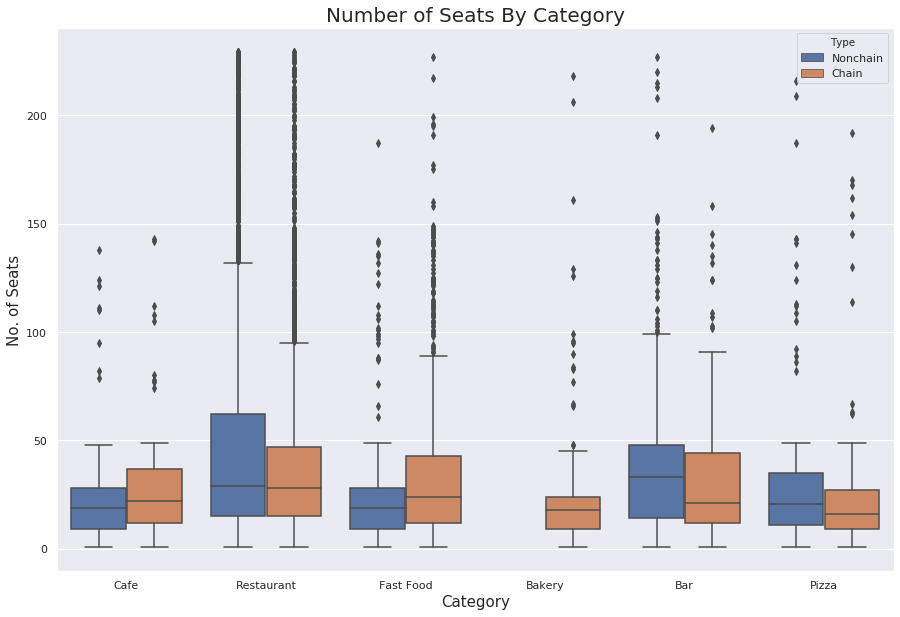

In [36]:
rest_data_seats_copy = rest_data_seats.copy()
rest_data_seats_copy['chain'] = rest_data_seats_copy['chain'].astype('str')
rest_data_seats_copy['chain'] = rest_data_seats_copy['chain'].replace({'True':'Chain', 'False':'Nonchain'})

rest_data_seats_copy = rest_data_seats_copy.rename(columns = ({'chain':'Type'}))

sns.set(rc={'figure.figsize':(15,10)})
sns.boxplot(x="object_type", y="number", hue = 'Type', data=rest_data_seats_copy) 
plt.xlabel('Category', fontsize = 15)
plt.ylabel('No. of Seats', fontsize = 15)
plt.title('Number of Seats By Category', fontsize = 20)

plt.savefig('number_of_seats_boxplots.png', bbox_inches = "tight")
plt.show()



##### Conclusions: 

- big change in median value for Bar - nonchain has larger number of seats
- top values 50: cafe, pizza, bakey. These are the small estblishments
- top values 100: bar, fastfood. 
- above 100: inly nonchain restaurants. 
- the small places show less variablitiy



- Difference between boxplot and barplot:
    

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
It's great that you analyzed the graph in details.
</div>

<a class="anchor" id="26"></a>
### Put the data on street names from the address column in a separate column.

In [37]:
# creat a function that cleans the address values - return only the adress number and street name

def cleaning_check(raw):
    raw_address=usaddress.parse(raw)
    dict_address={}
    for i in raw_address:
        dict_address.update({i[1]:i[0]})
    #this line below checks for normal case with street and number    
    if 'StreetName' in dict_address.keys() and 'AddressNumber' in dict_address.keys():
        clean_adress=dict_address['AddressNumber']+","+str(dict_address['StreetName'] +" L.A")
        return clean_adress
    else:
        return 'no street or number'
    


In [38]:
rest_data['clean_street_check']=rest_data.address.apply(cleaning_check)

<a class="anchor" id="27"></a>
### Plot a graph of the top ten streets by number of restaurants.

In [39]:
rest_number_by_street = rest_data.groupby('clean_street_check').agg({'id':'nunique'}).reset_index().sort_values('id', ascending = False)
rest_number_by_street = rest_number_by_street.rename(columns = {'id' : 'count'})

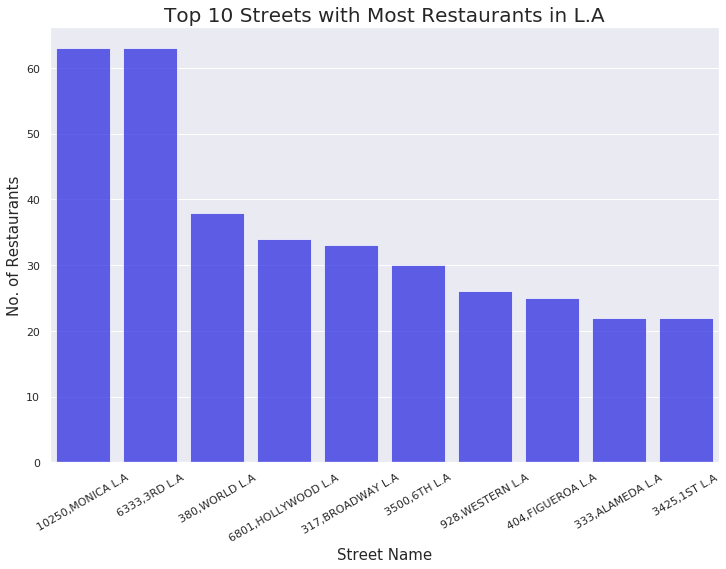

In [40]:
top_resturant_streets = rest_number_by_street.head(10)

sns.set(rc={'figure.figsize':(12,8)})
sns.barplot(data = top_resturant_streets, x = 'clean_street_check', y= 'count', alpha = 0.7, color = 'blue')
plt.xlabel('Street Name', fontsize = 15)
plt.ylabel('No. of Restaurants', fontsize = 15)
plt.title('Top 10 Streets with Most Restaurants in L.A', fontsize = 20)
plt.xticks(rotation = 30)
plt.show()

##### Conclusion:
- Browsing the web, it seemes top 10 streets are located around either busness centers or central commerical and stores complexes. 

<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you have sorted values.
    
Yes, top 10 streets defined correctly.
</div>

<a class="anchor" id="28"></a>
### Find the number of streets that only have one restaurant

In [41]:
only_one_rest_steets = len(rest_number_by_street[rest_number_by_street['count'] == 1])

print('The number of streets that have only one resturant is {}'.format(only_one_rest_steets))
print("These make {:.1%} of the data".format((only_one_rest_steets / len(rest_number_by_street))))

The number of streets that have only one resturant is 5083
These make 78.0% of the data


<div class="alert alert-warning" role="alert">
Reviewer's comment v. 1:
    
Could you please explain why we have streets with only one restaurant per street?
</div>

##### Conclusions (after v1):

Possible explantions for streets with only one restaurant:
- The renaming of the streets using the usaddress seperates the restaurants not only by the street name, but also by the restaurant street number. Therefore, many restaurants who share the same street, are still seperate by the number.
- The fact that the data contain many nonchain restaurants can suggest that many individual open their establishment in the more peripherial areas of L.A.

<div class="alert alert-success" role="alert">
Reviewer's comment v. 2:
    
Yes, but also it can be due to the length of the street. If you are interested see details about the smallest streets in the world: https://www.smithsonianmag.com/travel/top-ten-small-streets-worth-visiting-180954589/
</div>

<a class="anchor" id="29"></a>
### For streets with a lot of restaurants, look at the distribution of the number of seats. What trends can you see?

<a class="anchor" id="291"></a>
#### Average number of seats for top 10 streets after group

In [42]:
# filter rest_data, extract only rows of the top 10 streets (from top_resturant_streets df) and include avg seats column
rest_data_top_streets_filter = rest_data[rest_data['clean_street_check'].isin(top_resturant_streets['clean_street_check'])]
top_streets_grouped = rest_data_top_streets_filter.groupby('clean_street_check').agg({'id':'nunique','number':'mean'}).round().reset_index().sort_values('id', ascending = False)
top_streets_grouped = top_streets_grouped.rename(columns = {'id':'rest_number', 'number':'avg_seats'})

<a class="anchor" id="292"></a>
#### Number of seats distribution - top 10 streets

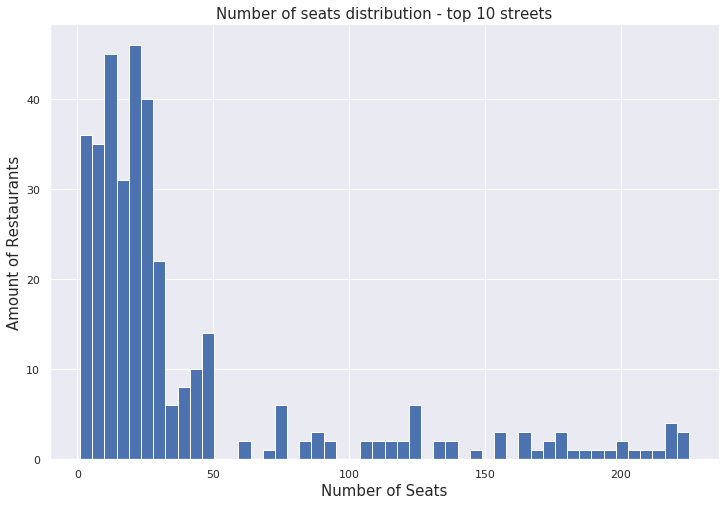

In [43]:
# plot histogram to see the distribution of avg seats for restaurants in the crowded streets 
rest_data_top_streets_filter.number.hist(bins = 50)
plt.xlabel('Number of Seats', fontsize = 15)
plt.ylabel('Amount of Restaurants', fontsize = 15)
plt.title('Number of seats distribution - top 10 streets', fontsize = 15)
plt.show()

In [44]:
# statistics based on hist

# after revieiwing the histogram, a noticble change is viewed at avg seats of ~30.
# check the prectange of restaurants with 30 seats or less
display(len(rest_data_top_streets_filter[rest_data_top_streets_filter['number'] <= 30]) / len(rest_data_top_streets_filter))

display(len(rest_data_top_streets_filter.loc[(rest_data_top_streets_filter['number'] > 30) & (rest_data_top_streets_filter['number'] < 150)]) / len(rest_data_top_streets_filter))

display(rest_data_top_streets_filter.number.mean())

0.702247191011236

0.21910112359550563

40.96348314606742

<a class="anchor" id="293"></a>
#### Number of seats distribution - total data

0.5541044776119403

0.39749170812603646

43.70356550580431

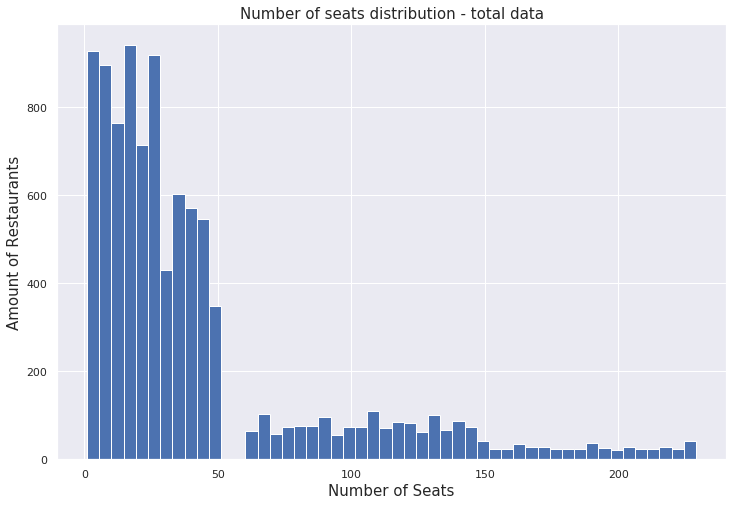

In [45]:
# compare to the total data distribution to spot differences

rest_data.number.hist(bins = 50)
plt.xlabel('Number of Seats', fontsize = 15)
plt.ylabel('Amount of Restaurants', fontsize = 15)
plt.title('Number of seats distribution - total data', fontsize = 15)

display(len(rest_data[rest_data['number'] <= 30]) / len(rest_data))

display(len(rest_data.loc[(rest_data['number'] > 30) & (rest_data['number'] < 150)]) / len(rest_data))

display(rest_data.number.mean())


##### Conclusions:
- restaurants establishments with 30 seats or less make 70% for the crowded streets, and only 55% of the overall data.

- restaurants establishments with 30-150 21.9% for the crowded streets, and only 39.7% of the overall data.


<a class="anchor" id="294"></a>
#### Additional Analysis: Check chain distrubutions 

In [46]:
display(len(rest_data_top_streets_filter[rest_data_top_streets_filter['chain'] == True]) / len(rest_data_top_streets_filter))
display(len(rest_data[rest_data['chain'] == True]) / len(rest_data))

0.37359550561797755

0.38101160862354894

##### Conclusions:
- chain/non chain is similar in crowded street to the overall data

<a class="anchor" id="295"></a>
####  Average seats vs. rest number in streets: General data gropued by street

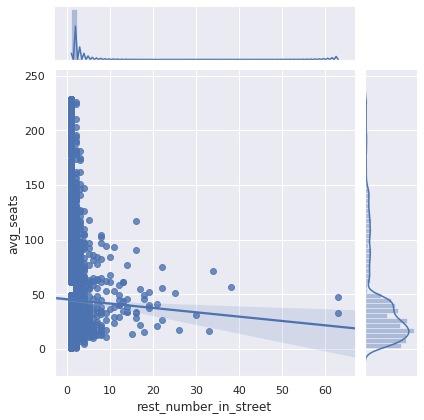

In [47]:
# group general data by street
test1 = rest_data.groupby('clean_street_check').agg({'id':'nunique','number':'mean'}).round().reset_index().sort_values('id', ascending = False)
test1 = test1.rename(columns = {'id':'rest_number_in_street', 'number':'avg_seats'})

# plot 
sns.jointplot(x="rest_number_in_street", y="avg_seats", data=test1, kind='reg') 
plt.savefig('testfig.png')

##### Conclusions:
- if rest number in a street is larger then 20 - there is no rest with more then 100 seats.
- if seats number is larger then 150 - no more then 5-6 rests in the street 
- the majority of the restaurants have 50 seats or less 
- The trendline seems unrealiable due to the few data points of high rest_number_in streets column.


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Well done that you analysed graphs in details.
</div>

<a class="anchor" id="296"></a>
#### Average seats vs. rest number in streets: General data (not grouped)

In [48]:
rest_data_merged = pd.merge(left = rest_data, right = rest_number_by_street, on = 'clean_street_check')

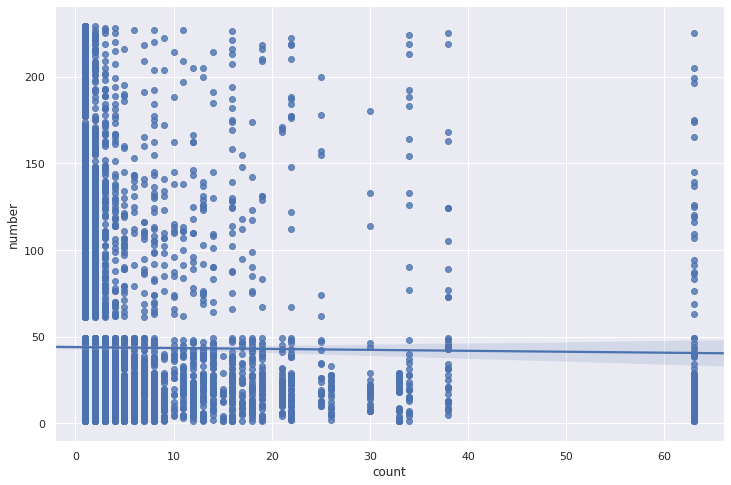

In [49]:
ax = sns.regplot(x="count", y="number", data=rest_data_merged)

##### Conclusions:
- The plots is similar to the grouped by streets, no clear trend was identified. 

##### Conclusion:
- There is no significant difference in the distribution when using 50 seats as seperator between small and big establishments

0.5271639042357275

44.79604051565378

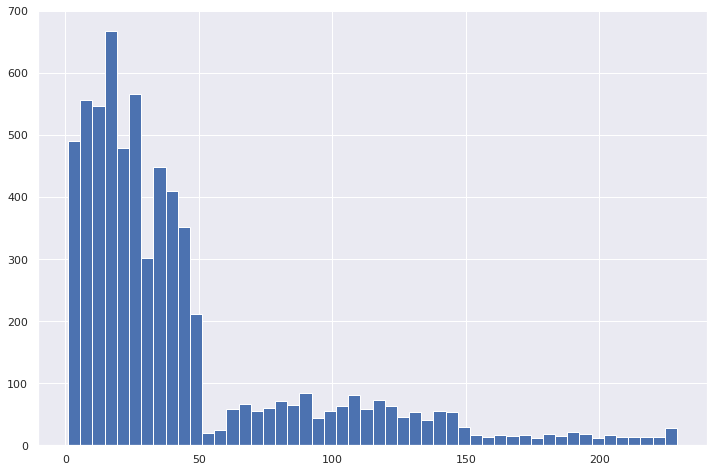

In [50]:
# previoues <a class="anchor" id="293"></a>
#### Average number of seats distribution - total data

# comparison to the overall data:

test1 = rest_data.groupby('clean_street_check').agg({'id':'nunique','number':'mean'}).round().reset_index().sort_values('id', ascending = False)
test1 = test1.rename(columns = {'id':'rest_number_in_street', 'number':'avg_seats'})
test1.avg_seats.hist(bins = 50)

# statistics based on hist

display(len(test1[test1['avg_seats'] <= 30]) / len(test1))

display(test1.avg_seats.mean())


<a class="anchor" id="3"></a>
# Step 3. Overall Conclusion

<a class="anchor" id="3.1"></a>
### Market Conditions


Observaions:

- Nonchain establishments has 10% more seats then chains. 

- While most objects in the data who are classified as chains df are from the restaurants object type, We see that they make only 31.6% of the total restaurants.

- As expected, chains are more common for objects which are more casual - Pizzas, Cafes and Fast food. 

- it is importent to note that Bakeries, Pizzas, Bars and Cafes all have very few objects of in the data (less then 10% of each)

Number of Seats Distribution:
- top values 50: cafe, pizza, bakey. These are the small estblishments
- top values 100: bar, fastfood. 
- above 100: inly nonchain restaurants. 
- the small places show less variablitiy


Crowded streets:

- Browsing the web, it seemes top 10 streets are located around either buisness centers or central commercial  and stores complexes. 
- Restaurants at the top 10 streets show greate precetange of smaller number of seats (<30), and higher precentage of 30-150 seats compare to the total data. 

- No dramatic change was observed for crowded/general data in terms of chain/nonchain distribution.


<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
An excellent conclusion which highlights all the main results of the project. 
</div>

<a class="anchor" id="3.2"></a>
### For robot run cafe Establishment

- Cafe Category has high Scalability potential:
While they make only 4.51% of the overall data, cafes are characterized by 61.1% chain establishments. 


- Cafes are smaller in size, which lower the cost of our robot-run cafe joint:
Cafes are characterized by lower number of average seats compare to restaurants, and as a result can be easier to operate (lower cost of human staff and operational costs for rent)


- Places to consider:
Automation can be most profitable at crowded places, the highest potential is at:
10250 Santa Monica Blvd.
6333 W 3rd .



<div class="alert alert-success" role="alert">
Reviewer's comment v. 1:
    
Yes, a reasonable recommendations :)
</div>